<a href="https://colab.research.google.com/github/pin94/car-price/blob/main/car-price-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars = pd.read_csv('/content/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

  - Yang beda:
    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [ ]:
cars.CompanyName = cars.CompanyName.str.lower()

In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

In [ ]:
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
#check for duplicated value
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


# EDA

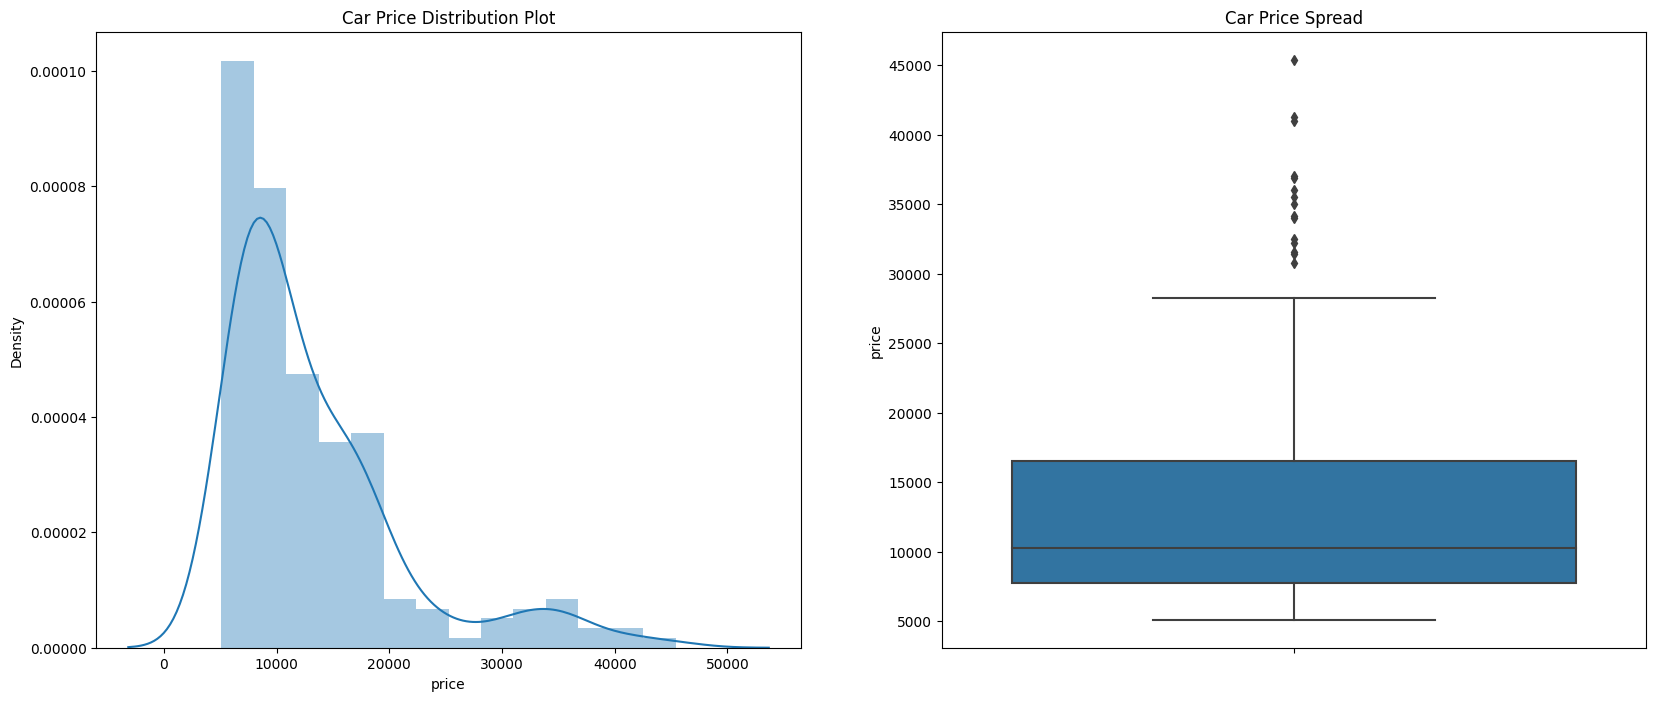

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [ ]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


## Visualize Categorical Variable

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

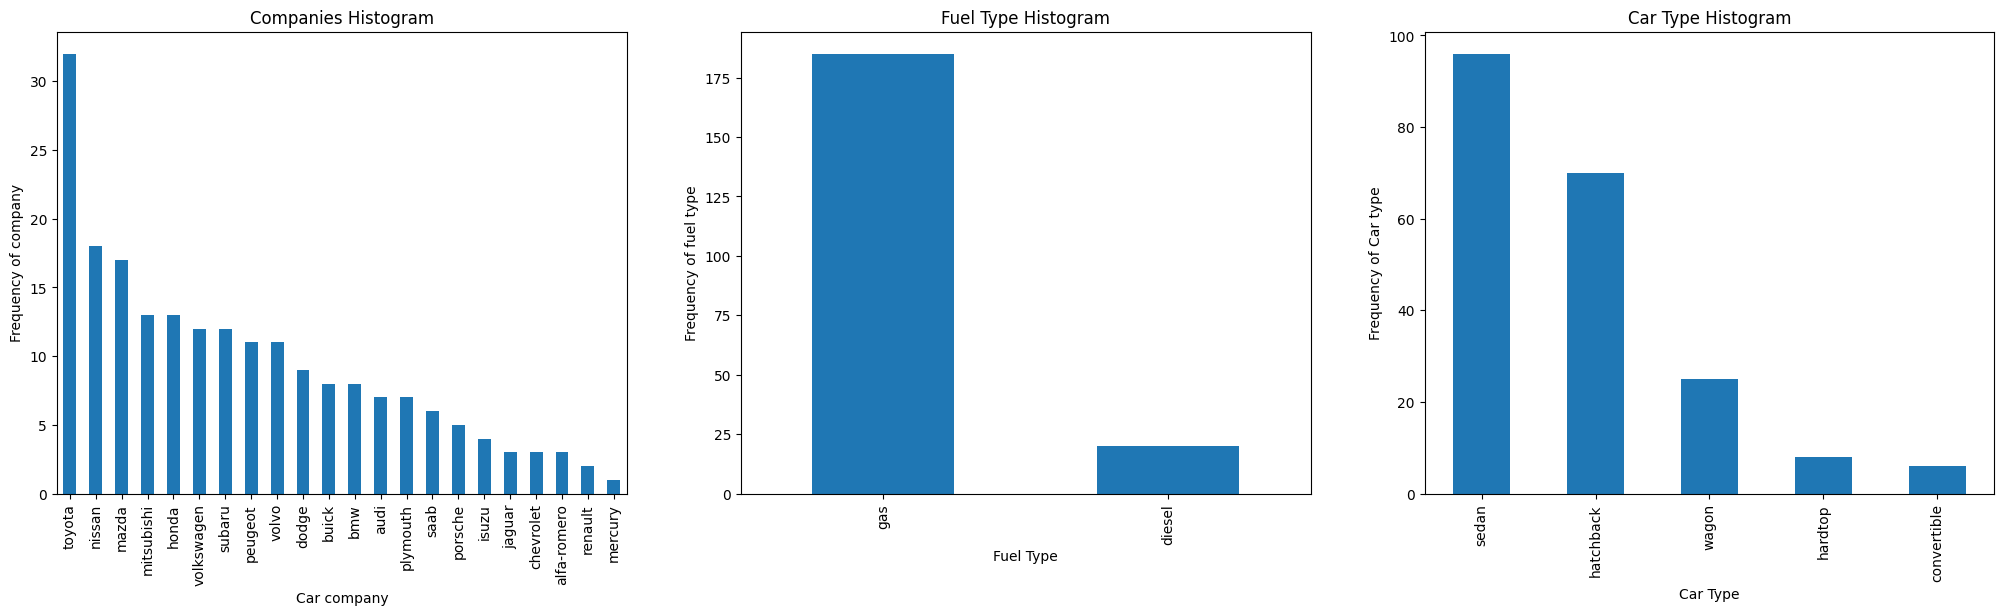

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

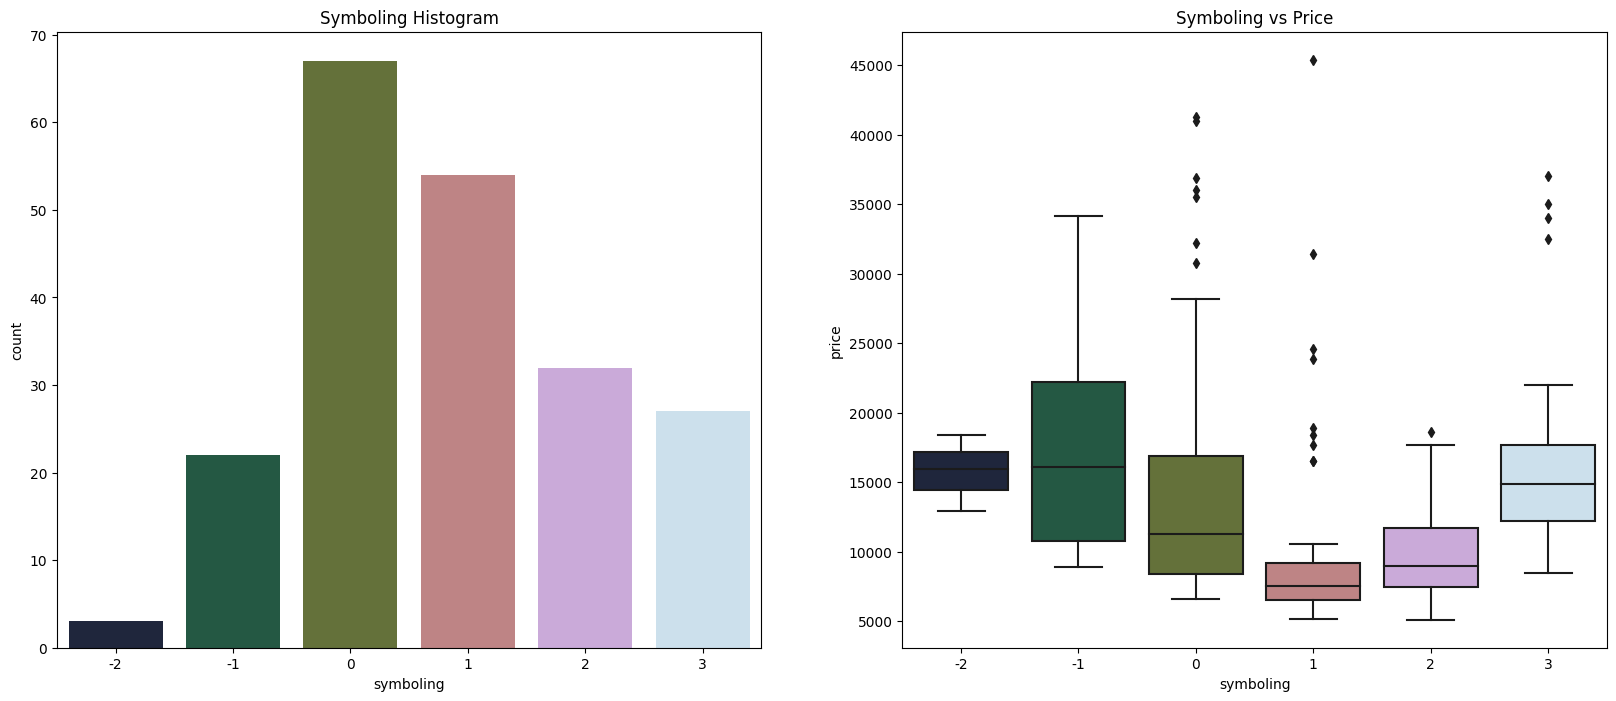

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(x = cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

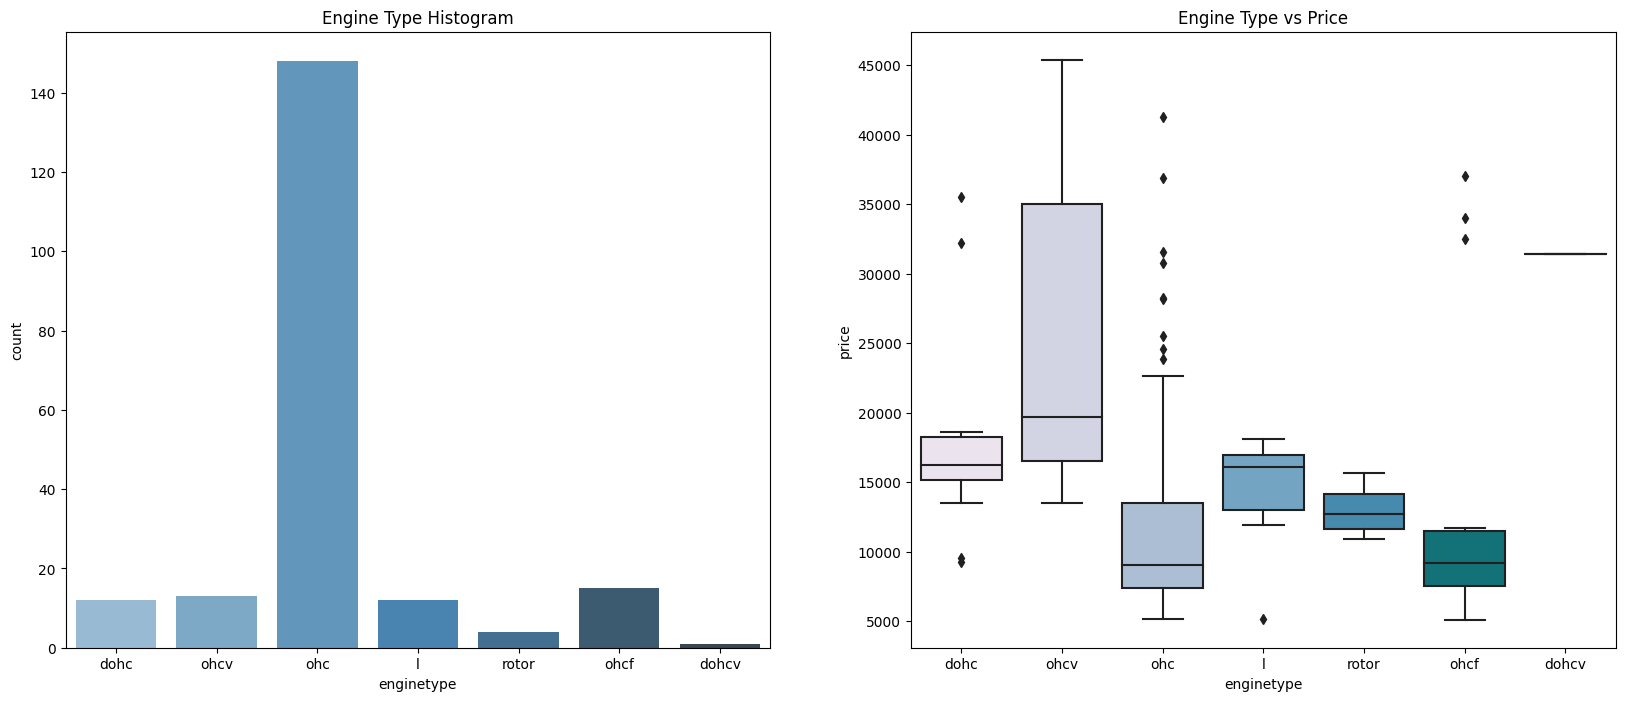

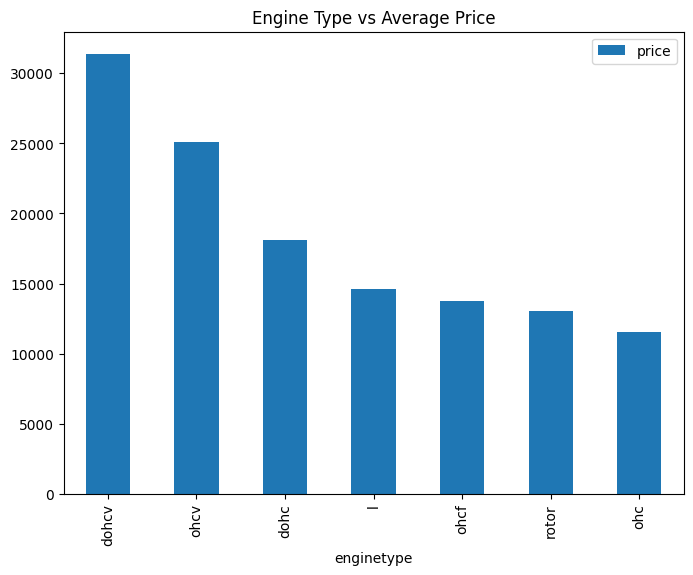

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(x = cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

- Rangkuman:
      - Symboling menunjukan adanya pengaruh terhadap harga
      - Fuel type menunjukan adanya pengaruh terhada harga 

<Figure size 2500x600 with 0 Axes>

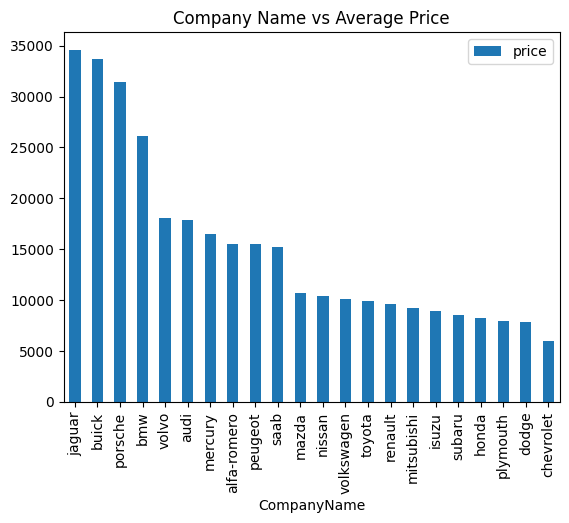

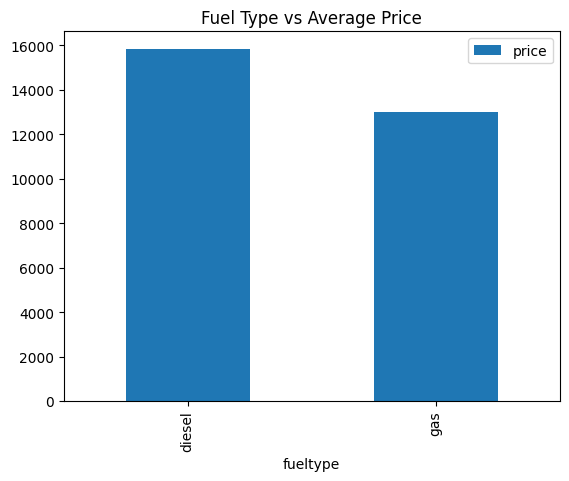

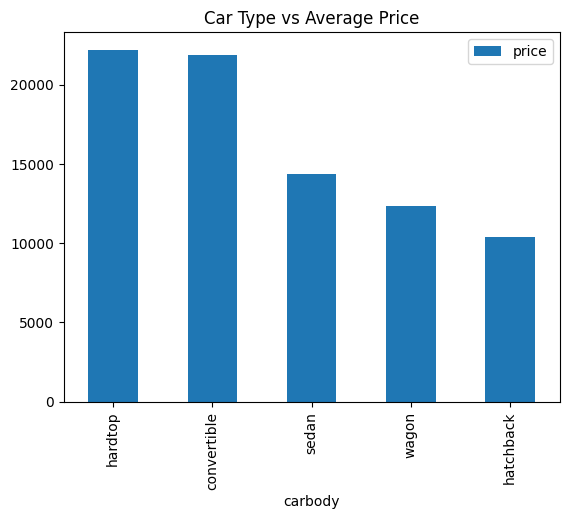

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

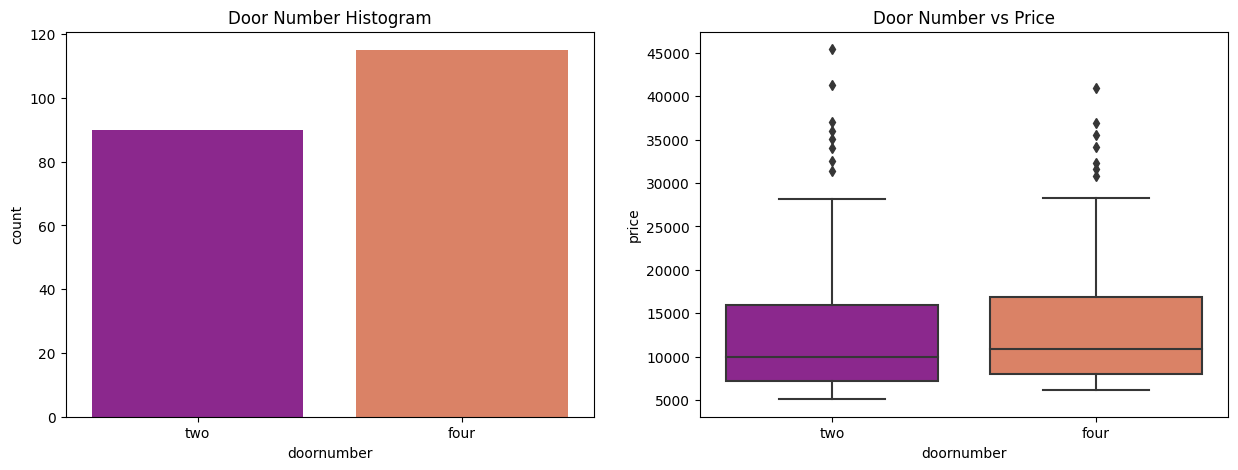

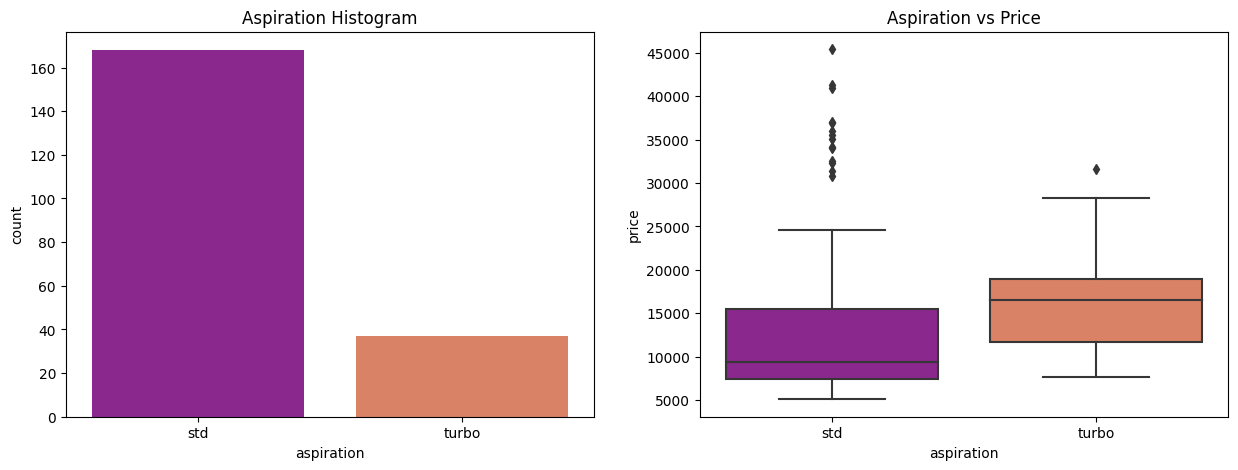

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(x = cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(x=cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

- Rangkuman:
      - Symboling menunjukan adanya pengaruh terhadap harga
      - Fuel type menunjukan adanya pengaruh terhada harga 
      - Door number tidak menunjukan adanya pengaruh terhada harga 
      - Aspiration menunjukan adanya pengaruh terhada harga 

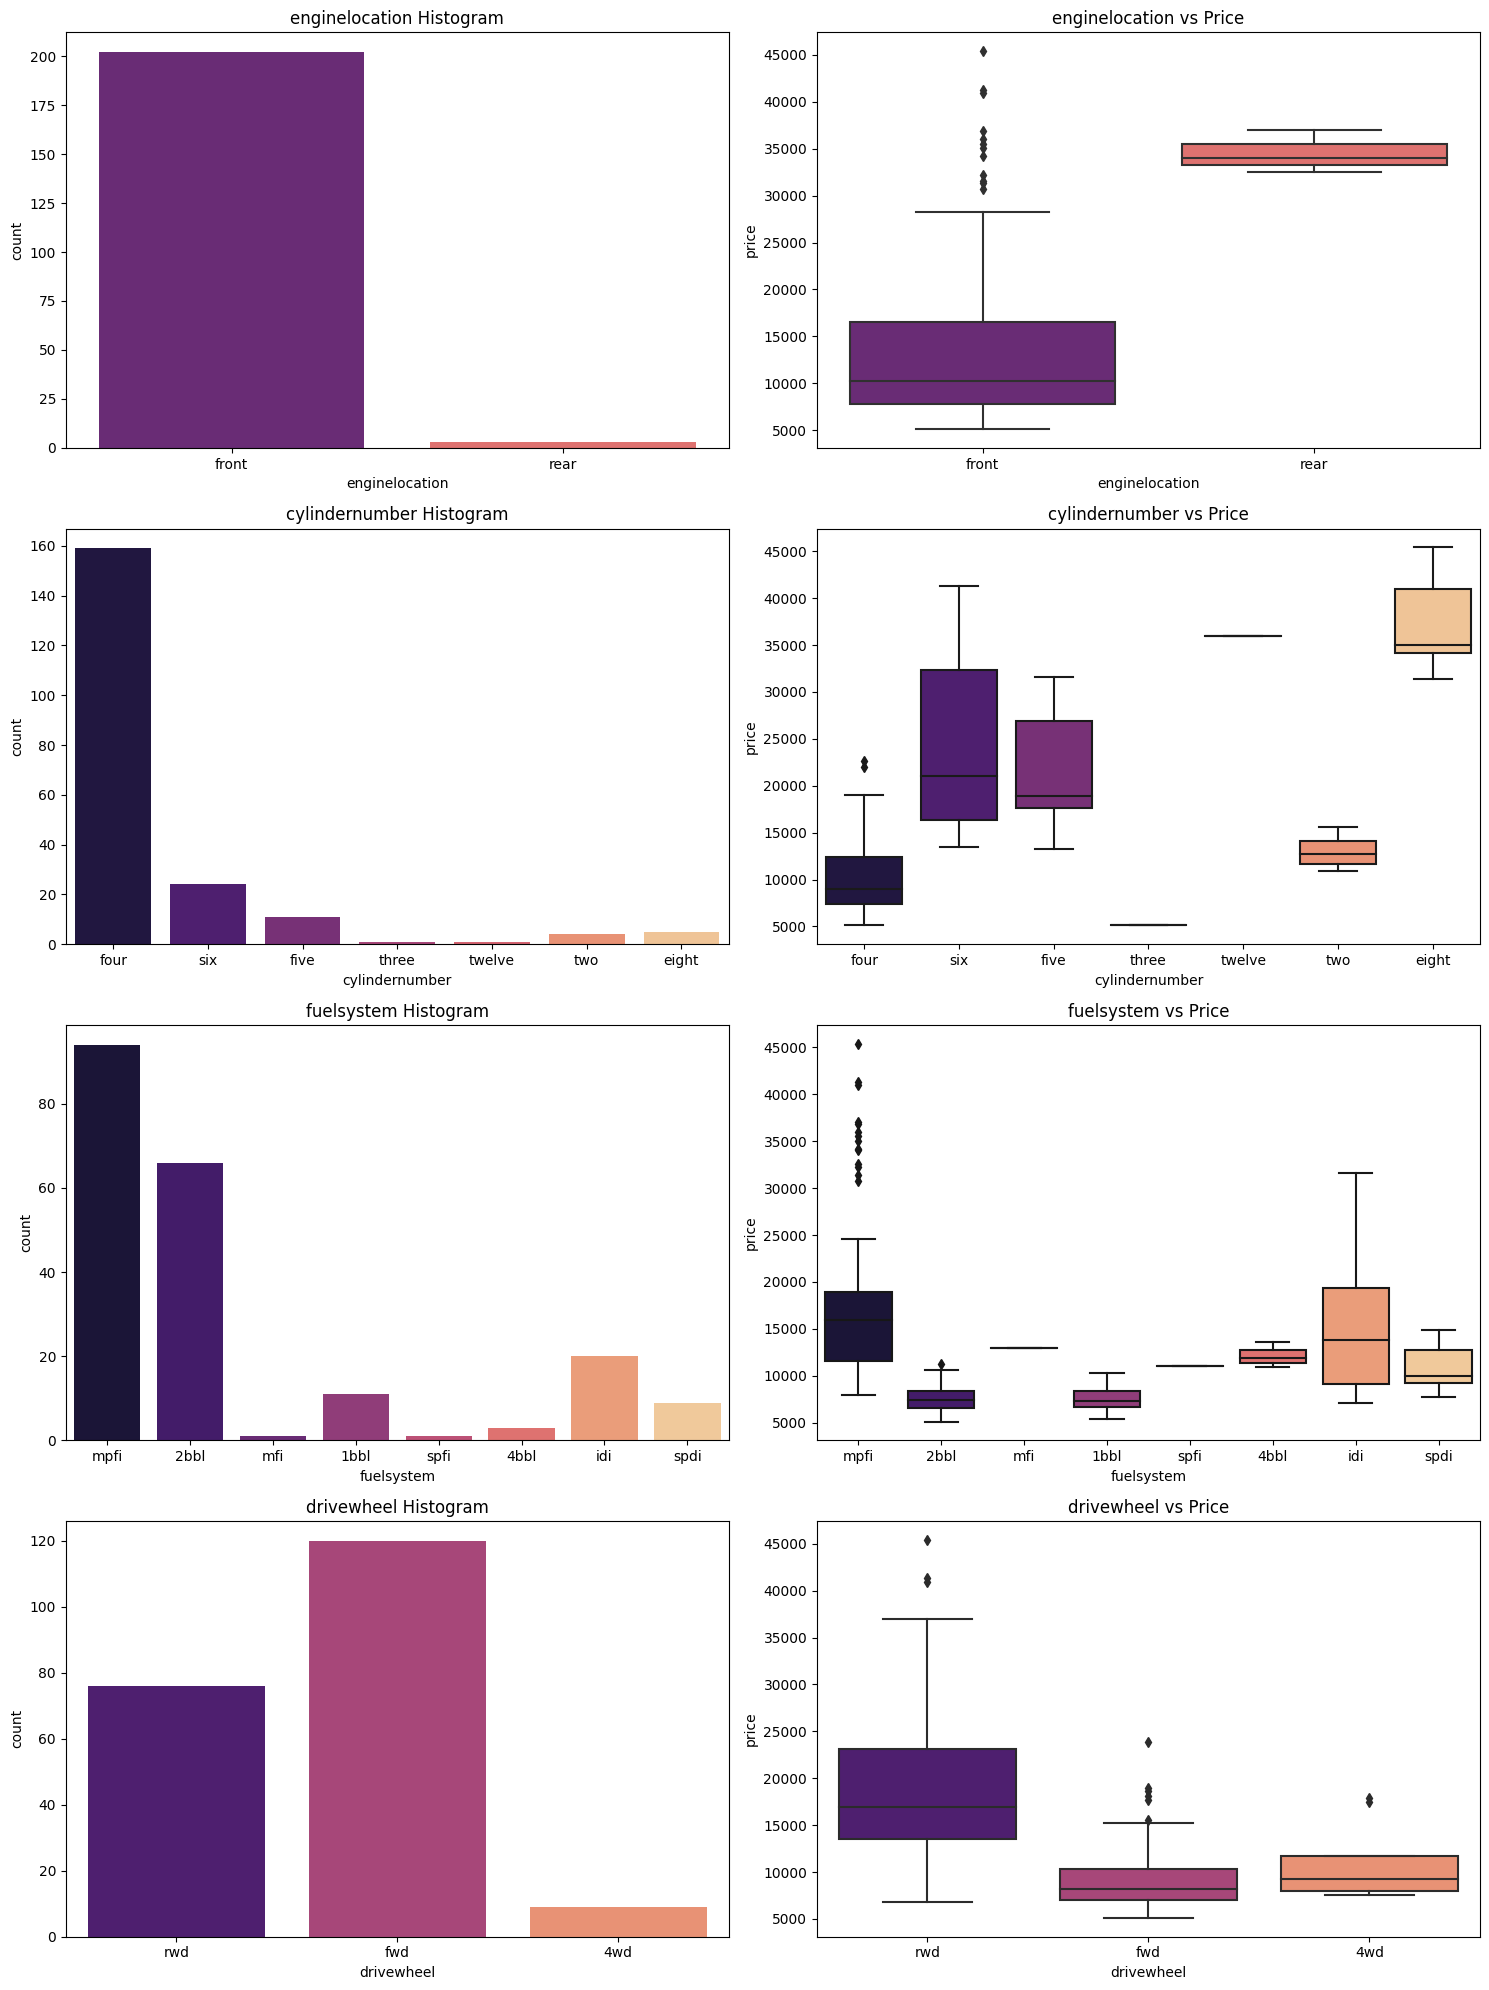

In [ ]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(x = cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

- Rangkuman dari categoric variable:
      - Symboling menunjukan adanya pengaruh terhadap harga
      - Fuel type menunjukan adanya pengaruh terhada harga 
      - Door number tidak menunjukan adanya pengaruh terhada harga (exclude dari model)
      - Aspiration menunjukan adanya pengaruh terhada harga 
      - enginelocation menunjukan adanya pengaruh terhada harga 
      - cylindernumber menunjukan adanya pengaruh terhada harga 
      - fuelsystem menunjukan adanya pengaruh terhada harga 
      - drivewheel menunjukan adanya pengaruh terhada harga 

## Visualize Numerical Variable

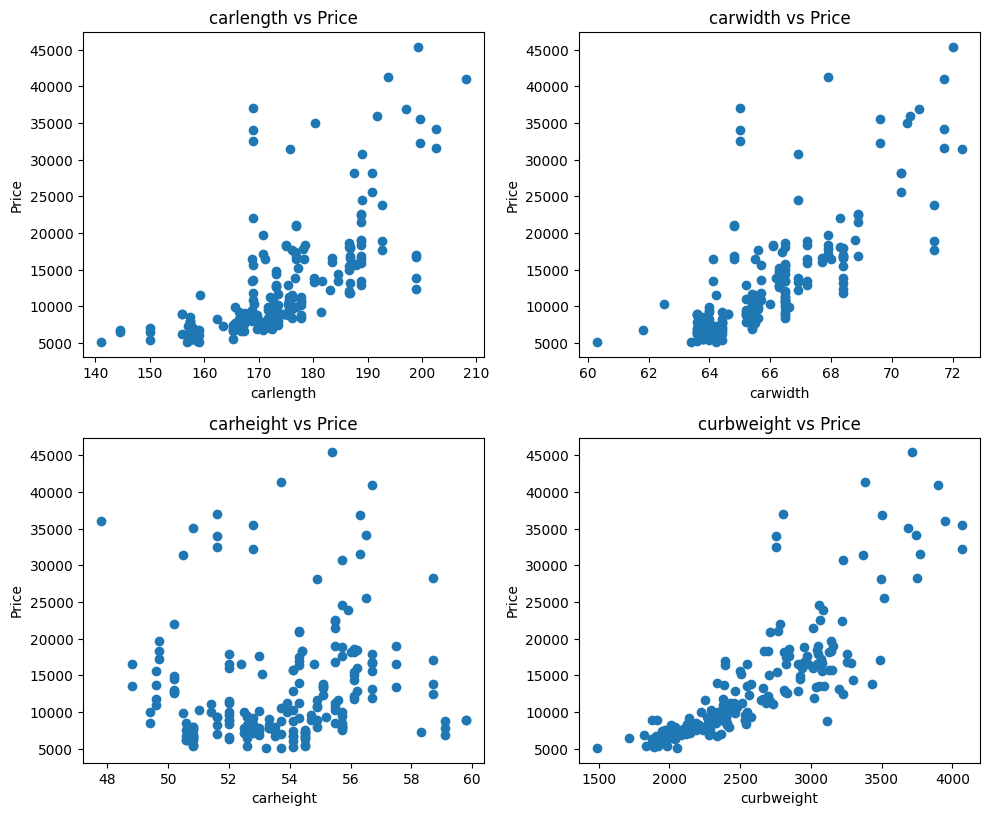

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(x=cars[x],y=cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

- Rangkuman dari numerical variable:
      - carlength menunjukan adanya pengaruh terhadap harga
      - carwidth menunjukan adanya pengaruh terhada harga 
      - carheight tidak menunjukan adanya pengaruh terhada harga (exclude dari model)
      - curbweight menunjukan adanya pengaruh terhada harga 

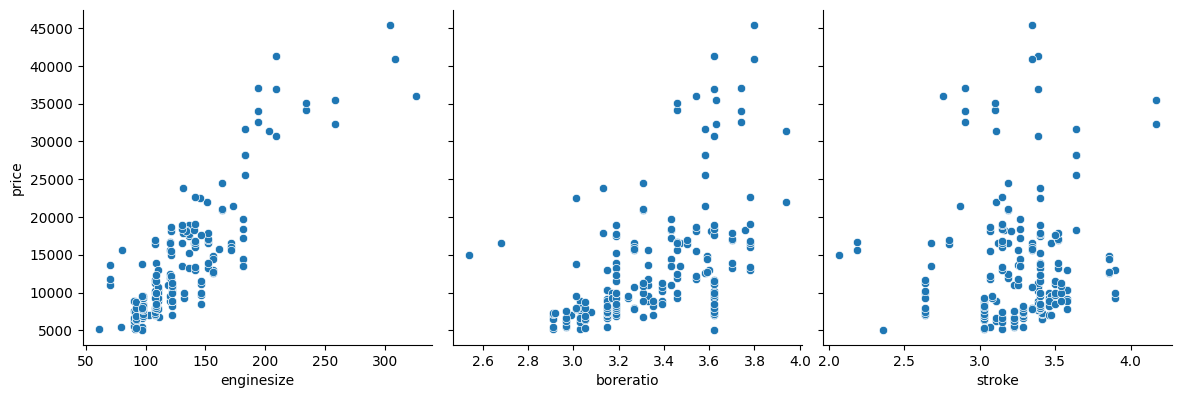

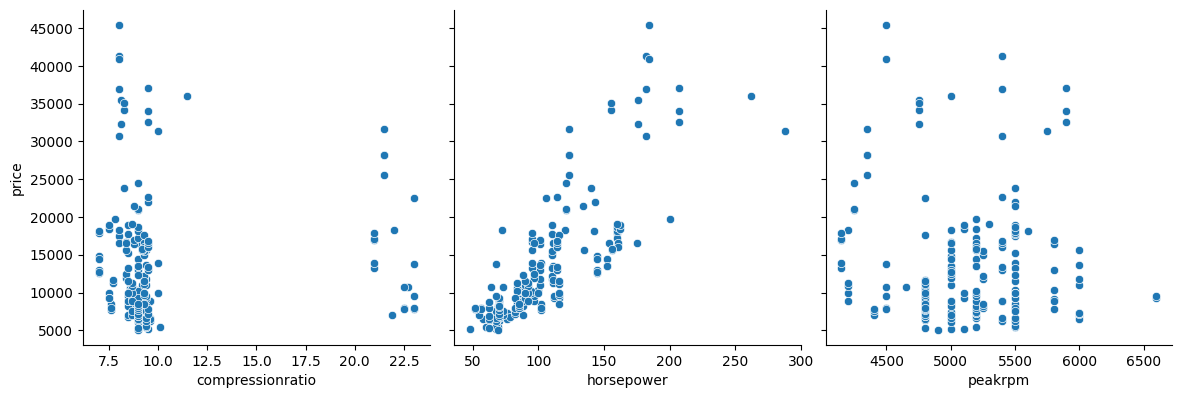

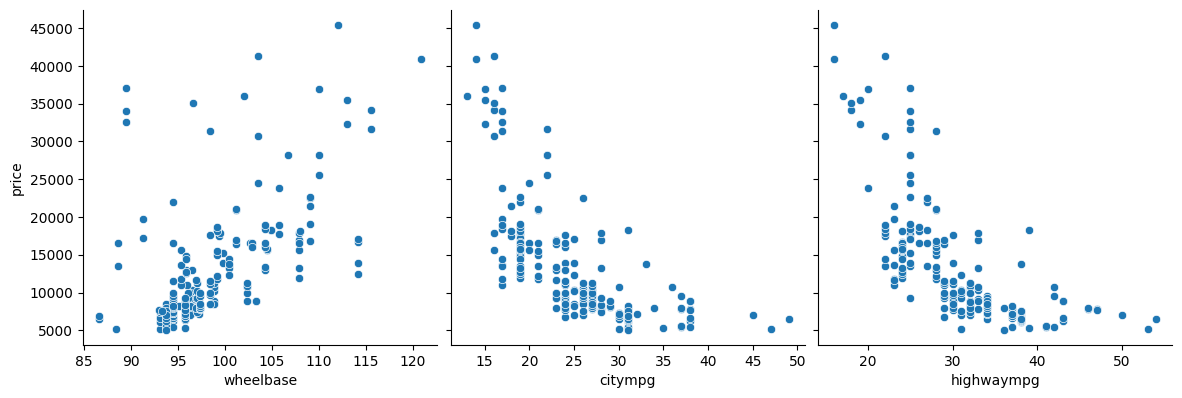

In [ ]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

- Rangkuman dari numerical variable:
      - carlength menunjukan adanya pengaruh terhadap harga
      - carwidth menunjukan adanya pengaruh terhada harga 
      - carheight tidak menunjukan adanya pengaruh terhada harga (exclude dari model)
      - enginesize menunjukan adanya pengaruh terhada harga 
      - boreratio menunjukan adanya pengaruh terhada harga 
      - horsepower menunjukan adanya pengaruh terhada harga 
      - wheelbase menunjukan adanya pengaruh terhada harga 
      - citympg menunjukan adanya pengaruh terhada harga 
      - highwaympg menunjukan adanya pengaruh terhada harga 
      - stroke tidak menunjukan adanya pengaruh terhada harga (exclude dari model)
      - compressionratio tidak menunjukan adanya pengaruh terhada harga (exclude dari model)
      - peakrpm tidak menunjukan adanya pengaruh terhada harga (exclude dari model)


## Feature Engineering

In [ ]:
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [ ]:
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


## Feature Selection
- Rangkuman dari categoric variable:
      - Symboling menunjukan adanya pengaruh terhadap harga
      - Fuel type menunjukan adanya pengaruh terhada harga 
      - Aspiration menunjukan adanya pengaruh terhada harga 
      - enginelocation menunjukan adanya pengaruh terhada harga 
      - cylindernumber menunjukan adanya pengaruh terhada harga 
      - fuelsystem menunjukan adanya pengaruh terhada harga 
      - drivewheel menunjukan adanya pengaruh terhada harga 

- Rangkuman dari numerical variable:
      - carlength menunjukan adanya pengaruh terhadap harga
      - carwidth menunjukan adanya pengaruh terhada harga 
      - enginesize menunjukan adanya pengaruh terhada harga 
      - boreratio menunjukan adanya pengaruh terhada harga 
      - horsepower menunjukan adanya pengaruh terhada harga 
      - wheelbase menunjukan adanya pengaruh terhada harga 
      - fueleconomy menunjukan adanya pengaruh terhada harga 

In [ ]:
variabel_siginifikan = ['price','symboling','fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth',]

In [ ]:
df = cars[variabel_siginifikan]

In [ ]:
df.head()

,price,symboling,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13495.0,3,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
1,16500.0,3,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
2,16500.0,1,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5
3,13950.0,2,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2
4,17450.0,2,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4


In [ ]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df = dummies('fueltype',df)
df = dummies('aspiration',df)
df = dummies('carbody',df)
df = dummies('drivewheel',df)
df = dummies('enginetype',df)
df = dummies('cylindernumber',df)

In [ ]:
df.head()

,symboling,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,0,0,1,0,0,0,0
1,3,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,0,0,1,0,0,0,0
2,1,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,0,0,1,0,0,0,1,0,0,0
3,2,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,1,0,0,0,0,1,0,0,0,0
4,2,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,1,0,0,0,1,0,0,0,0,0


# Modeling

In [ ]:
y = df.pop('price')
X = df

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [ ]:
y_train

,symboling,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
122,1,gas,std,sedan,fwd,93.7,2191,ohc,four,98,2.97,68,34.15,167.3,63.8
125,3,gas,std,hatchback,rwd,94.5,2778,ohc,four,151,3.94,143,22.60,168.9,68.3
166,1,gas,std,hatchback,rwd,94.5,2300,dohc,four,98,3.24,112,27.35,168.7,64.0
1,3,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
199,-1,gas,turbo,wagon,rwd,104.3,3157,ohc,four,130,3.62,162,19.25,188.8,67.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,gas,turbo,sedan,fwd,96.3,2403,ohc,four,110,3.17,116,26.15,172.4,65.4
103,0,gas,std,sedan,fwd,100.4,3060,ohcv,six,181,3.43,152,21.70,184.6,66.5
67,-1,diesel,turbo,sedan,rwd,110.0,3515,ohc,five,183,3.58,123,23.35,190.9,70.3
24,1,gas,std,hatchback,fwd,93.7,1967,ohc,four,90,2.97,68,34.15,157.3,63.8


In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

#error dari linear regression dari data training
predicted = lm.predict(X_train)

print("Hasil MSE dari Linreg data training",mean_squared_error(y_train, predicted))
print("Hasil RMSE dari Linreg data training", math.sqrt(mean_squared_error(y_train, predicted)))

Hasil MSE dari Linreg data training 4857507.8235012125
Hasil RMSE dari Linreg data training 2203.9754589153695


In [ ]:
#data testing
predicted = lm.predict(X_test)

print("Hasil MSE dari Linreg data testing",mean_squared_error(y_test, predicted))
print("Hasil RMSE dari Linreg data testing", math.sqrt(mean_squared_error(y_test, predicted)))

Hasil MSE dari Linreg data testing 9524195.025437891
Hasil RMSE dari Linreg data testing 3086.129457012115


In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [ ]:
build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     46.66
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           5.87e-50
Time:                        14:41:36   Log-Likelihood:                -1303.7
No. Observations:                 143   AIC:                             2665.
Df Residuals:                     114   BIC:                             2751.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.369e+04   1.66e+04     -2.639      

,const,symboling,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,1.0,1,93.7,2191,98,2.97,68,34.15,167.3,63.8,...,1,0,0,0,0,1,0,0,0,0
125,1.0,3,94.5,2778,151,3.94,143,22.60,168.9,68.3,...,1,0,0,0,0,1,0,0,0,0
166,1.0,1,94.5,2300,98,3.24,112,27.35,168.7,64.0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,3,88.6,2548,130,3.47,111,23.70,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
199,1.0,-1,104.3,3157,130,3.62,162,19.25,188.8,67.2,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.0,1,96.3,2403,110,3.17,116,26.15,172.4,65.4,...,1,0,0,0,0,1,0,0,0,0
103,1.0,0,100.4,3060,181,3.43,152,21.70,184.6,66.5,...,0,0,1,0,0,0,1,0,0,0
67,1.0,-1,110.0,3515,183,3.58,123,23.35,190.9,70.3,...,1,0,0,0,1,0,0,0,0,0
24,1.0,1,93.7,1967,90,2.97,68,34.15,157.3,63.8,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit decision tree model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
predicted_2 = regr_1.predict(X_train)
predicted_5 = regr_2.predict(X_train)

print('Hasil Max Dept 2')

print("Hasil MSE dari Linreg data training",mean_squared_error(y_train, predicted_2))
print("Hasil RMSE dari Linreg data training", math.sqrt(mean_squared_error(y_train, predicted_2)))

print('Hasil Max Dept 5')

print("Hasil MSE dari Linreg data training",mean_squared_error(y_train, predicted_5))
print("Hasil RMSE dari Linreg data training", math.sqrt(mean_squared_error(y_train, predicted_5)))

Hasil Max Dept 2
Hasil MSE dari Linreg data training 7620505.788699794
Hasil RMSE dari Linreg data training 2760.52636080509
Hasil Max Dept 5
Hasil MSE dari Linreg data training 1814587.258346954
Hasil RMSE dari Linreg data training 1347.0661670263098


In [ ]:
predicted_2 = regr_1.predict(X_test)
predicted_5 = regr_2.predict(X_test)

print('Hasil Max Dept 2')

print("Hasil MSE dari Linreg data testing", mean_squared_error(y_test, predicted_2))
print("Hasil RMSE dari Linreg data testing", math.sqrt(mean_squared_error(y_test, predicted_2)))

print('Hasil Max Dept 5')

print("Hasil MSE dari Linreg data testing", mean_squared_error(y_test, predicted_5))
print("Hasil RMSE dari Linreg data testing", math.sqrt(mean_squared_error(y_test, predicted_5)))

Hasil Max Dept 2
Hasil MSE dari Linreg data testing 11514821.939351471
Hasil RMSE dari Linreg data testing 3393.3496635848583
Hasil Max Dept 5
Hasil MSE dari Linreg data testing 9652661.252504313
Hasil RMSE dari Linreg data testing 3106.873227620386
